### Handle-Imbalanced-Dataset - Multi class classification

Glass Identification Data Set 

Source: UCI Machine learning repository
    
Attribute Information:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps

    

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('glassdata.csv')

In [4]:
df.shape

(214, 11)

In [5]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [9]:
df.isnull().value_counts()

Id     RI     Na     Mg     Al     Si     K      Ca     Ba     Fe     Type 
False  False  False  False  False  False  False  False  False  False  False    214
dtype: int64

Text(0, 0.5, 'Frequency')

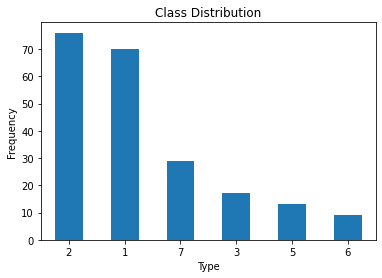

In [11]:
count_class = pd.value_counts(df['Type'], sort=True)

count_class.plot(kind='bar',rot=0)

plt.title('Class Distribution')

plt.xlabel('Type')

plt.ylabel('Frequency')

In [12]:
#### Independent and Dependent Features
X=df.drop("Type",axis=1)
y=df.Type

In [17]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter

### SMOTE:Synthetic Minority Oversampling Technique - Oversampling method

In [22]:
smt = SMOTE(random_state=42)
x_resample,y_resample = smt.fit_resample(X,y)

In [23]:
print('Original dataset shape {}'.format(Counter(y)))
print('Original dataset shape {}'.format(Counter(y_resample)))


Original dataset shape Counter({2: 76, 1: 70, 7: 29, 3: 17, 5: 13, 6: 9})
Original dataset shape Counter({1: 76, 2: 76, 3: 76, 5: 76, 6: 76, 7: 76})


### NearMiss: Under Sampling Method

Disadvantages:in undersampling it tend to remove instances from data that may be carrying some important information

In [27]:
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,y)

In [28]:
print('Original dataset shape {}'.format(Counter(y)))
print('Original dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({2: 76, 1: 70, 7: 29, 3: 17, 5: 13, 6: 9})
Original dataset shape Counter({1: 9, 2: 9, 3: 9, 5: 9, 6: 9, 7: 9})


### SMOTETOMEK : 

In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).


In [31]:
over_undersamler = SMOTETomek(random_state=42)
X_res1, y_res1 = smt.fit_resample(X, y)

In [32]:
print('Original dataset shape {}'.format(Counter(y)))
print('Original dataset shape {}'.format(Counter(y_res1)))

Original dataset shape Counter({2: 76, 1: 70, 7: 29, 3: 17, 5: 13, 6: 9})
Original dataset shape Counter({1: 76, 2: 76, 3: 76, 5: 76, 6: 76, 7: 76})


## Handle-Imbalanced-Dataset - Binary classification

Haberman's Survival Data Set:The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Source: UCI Machine learning repository

Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year


In [33]:
df1 = pd.read_csv('habermandata.csv')

In [34]:
df1.shape

(306, 4)

In [35]:
df1.head()

,Age,year_operation,positive_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [36]:
df1.isnull().value_counts()

Age    year_operation  positive_nodes  survival
False  False           False           False       306
dtype: int64

In [38]:
df1['survival'].value_counts()

1    225
2     81
Name: survival, dtype: int64

Text(0, 0.5, 'Frequency')

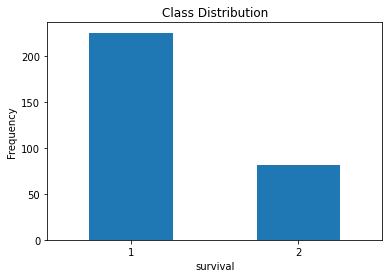

In [40]:
count_survival = pd.value_counts(df1['survival'], sort=True)

count_survival.plot(kind='bar',rot=0)

plt.title('Class Distribution')

plt.xlabel('survival')

plt.ylabel('Frequency')

In [42]:
#### Independent and Dependent Features
X=df1.drop("survival",axis=1)
y=df1.survival

### NearMiss

In [43]:
nm2 = NearMiss()
X_resm,y_resm=nm.fit_resample(X,y)

In [44]:
print('Original dataset shape {}'.format(Counter(y)))
print('Original dataset shape {}'.format(Counter(y_resm)))

Original dataset shape Counter({1: 225, 2: 81})
Original dataset shape Counter({1: 81, 2: 81})


### SMOTE

In [45]:
smt2 = SMOTE(random_state=42)
x_resample2,y_resample2 = smt.fit_resample(X,y)

In [46]:
print('Original dataset shape {}'.format(Counter(y)))
print('Original dataset shape {}'.format(Counter(y_resample2)))

Original dataset shape Counter({1: 225, 2: 81})
Original dataset shape Counter({1: 225, 2: 225})


### SMOTETOMEK

In [50]:
over_undersamler2 = SMOTETomek(random_state=42)
X_res2, y_res2 = smt.fit_resample(X, y)

In [48]:
print('Original dataset shape {}'.format(Counter(y)))
print('Original dataset shape {}'.format(Counter(y_res2)))

Original dataset shape Counter({1: 225, 2: 81})
Original dataset shape Counter({1: 225, 2: 225})
